# Import modules 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\KUNAL ZAVERI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the dataset 

In [2]:
train=pd.read_csv('train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
train.isnull().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)

In [4]:
test=pd.read_csv('test.csv')
Loan_ID=test.Loan_ID
ds=train.append(test)

In [5]:
ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


In [6]:
ds.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
357,LP002952,Male,No,0,Graduate,No,2500,0.0,60.0,360.0,1.0,Urban
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural
359,LP002962,Male,No,0,Graduate,No,4000,2667.0,152.0,360.0,1.0,Semiurban
360,LP002965,Female,Yes,0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban
361,LP002969,Male,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [8]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# checking data contain null value or not 

In [9]:
ds.isnull().sum()


Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

# Now filling the null values which shown above 

### filling the value using mean of the value 

In [10]:
ds['LoanAmount'] = ds['LoanAmount'].fillna(ds['LoanAmount'].mean())

In [11]:
ds['Credit_History'] = ds['Credit_History'].fillna(ds['Credit_History'].mean())

In [12]:
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mean())

In [13]:
ds.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

### filling the value using mode of the value 

In [14]:
ds['Married'] = ds["Married"].fillna(ds['Married'].mode()[0])

In [15]:
ds['Gender'] = ds["Gender"].fillna(ds['Gender'].mode()[0])

In [16]:
ds['Self_Employed'] = ds["Self_Employed"].fillna(ds['Self_Employed'].mode()[0])

In [17]:
ds['Dependents'] = ds["Dependents"].fillna(ds['Dependents'].mode()[0])

In [18]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

### categorical attributes visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

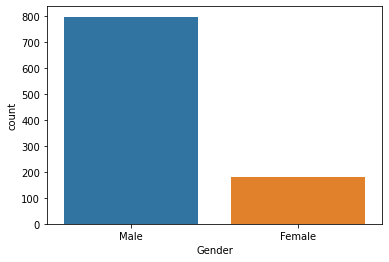

In [19]:
sns.countplot(ds['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

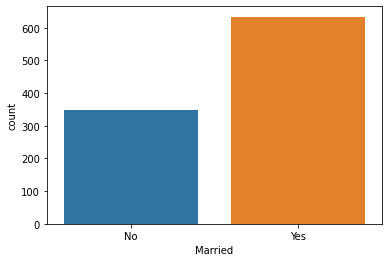

In [20]:
sns.countplot(ds['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

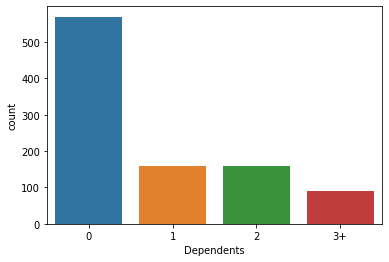

In [21]:
sns.countplot(ds['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

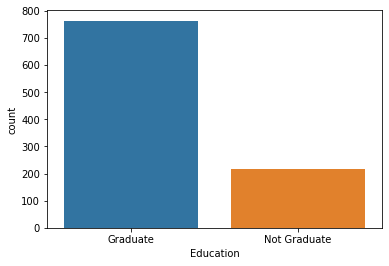

In [22]:
sns.countplot(ds['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

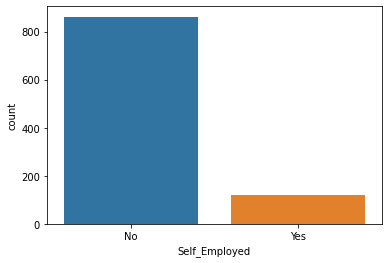

In [23]:
sns.countplot(ds['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

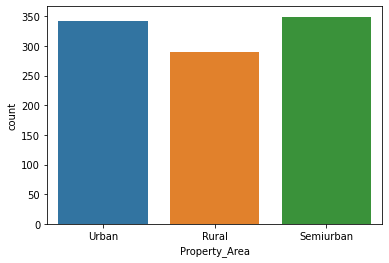

In [24]:
sns.countplot(ds['Property_Area'])

### numerical attributes visualization

<AxesSubplot:xlabel='ApplicantIncome'>

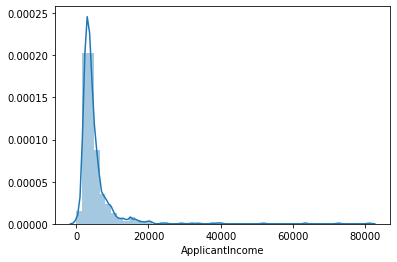

In [25]:
sns.distplot(ds["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

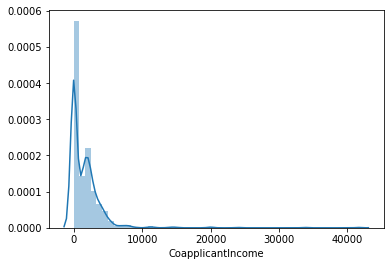

In [26]:
sns.distplot(ds["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

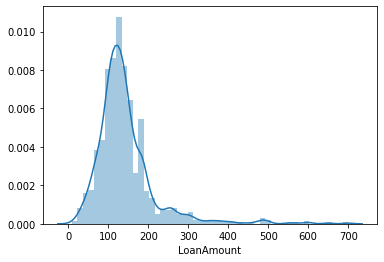

In [27]:
sns.distplot(ds["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term'>

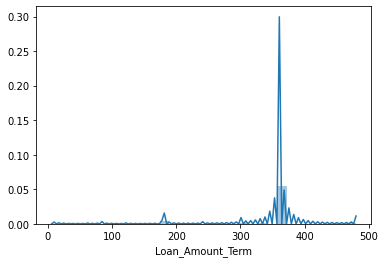

In [28]:
sns.distplot(ds['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History'>

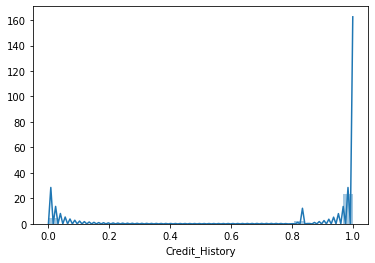

In [29]:
sns.distplot(ds['Credit_History'])

#  create new attribute 

In [30]:
ds['Total_Income'] = ds['ApplicantIncome'] + ds['CoapplicantIncome']

In [31]:
ds.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.00000,360.0,1.0,Urban,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.00000,360.0,1.0,Urban,3849.0


In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in cols:
    ds[col] = le.fit_transform(ds[col])

In [33]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,6000.0


In [34]:
cols=['Loan_ID']
ds = ds.drop(columns=cols, axis=1)
ds.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,5849.0
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,3000.0
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,4941.0
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,6000.0


# Coorelation Matrix


In [35]:
ds.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
Gender,1.000000,0.327012,0.139248,0.040649,0.024719,0.060444,0.082428,0.096499,-0.069625,0.021613,-0.020801,0.094346
Married,0.327012,1.000000,0.344291,0.026211,0.013666,0.052126,0.061606,0.156737,-0.048174,0.021964,0.006372,0.077085
Dependents,0.139248,0.344291,1.000000,0.084894,0.026241,0.122136,0.003223,0.149233,-0.082517,-0.044942,0.018639,0.116923
Education,0.040649,0.026211,0.084894,1.000000,-0.010848,-0.138909,-0.060380,-0.162215,-0.024001,-0.063411,-0.050685,-0.158577
Self_Employed,0.024719,0.013666,0.026241,-0.010848,1.000000,0.113106,-0.018861,0.106942,-0.031107,0.035597,-0.059678,0.098419
ApplicantIncome,0.060444,0.052126,0.122136,-0.138909,0.113106,1.000000,-0.114247,0.547188,-0.023051,0.022759,0.005513,0.893847
CoapplicantIncome,0.082428,0.061606,0.003223,-0.060380,-0.018861,-0.114247,1.000000,0.178449,-0.043705,-0.023075,-0.024921,0.343317
LoanAmount,0.096499,0.156737,0.149233,-0.162215,0.106942,0.547188,0.178449,1.000000,0.054827,-0.007532,-0.035653,0.597856
Loan_Amount_Term,-0.069625,-0.048174,-0.082517,-0.024001,-0.031107,-0.023051,-0.043705,0.054827,1.000000,-0.019284,-0.042209,-0.041518
Credit_History,0.021613,0.021964,-0.044942,-0.063411,0.035597,0.022759,-0.023075,-0.007532,-0.019284,1.000000,0.022291,0.011102


<AxesSubplot:>

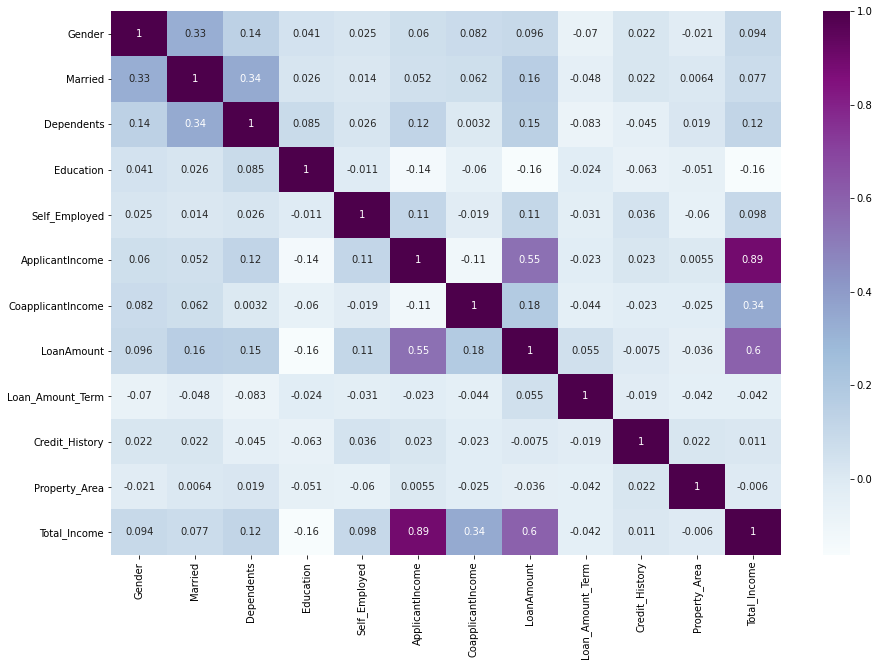

In [36]:
corr = ds.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

# Train-Test Split

In [37]:
train_X=ds.iloc[:614,]
train_y=Loan_status
X_test=ds.iloc[614:,]
seed=7

In [38]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=seed)

In [39]:
print(train_X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
192       1        1           0          1              0             6033   
280       1        0           1          1              1             4053   
418       1        1           0          0              0             1025   
259       1        1           3          1              0             4931   
436       1        0           0          0              0             1926   
..      ...      ...         ...        ...            ...              ...   
579       1        0           0          0              0             3182   
502       1        1           2          0              0             4865   
537       1        0           2          0              0             3617   
196       1        0           0          0              0             8333   
175       1        1           0          0              0             3497   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [40]:
print(test_X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
220       1        1           0          0              0             2221   
109       1        1           3          1              0             2071   
569       1        1           0          0              0             3166   
330       1        0           1          0              0             4384   
407       0        0           0          1              0             2213   
..      ...      ...         ...        ...            ...              ...   
515       1        1           3          0              0             3466   
89        1        1           0          0              0             5695   
65        1        1           0          0              0             5726   
478       1        1           1          0              1            16667   
329       0        0           0          0              0             2500   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# Model Training 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
seed=7
scoring='accuracy'

In [52]:
ypred=model.predict(test_X)
print(ypred)

[0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1]


In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
print(confusion_matrix(test_y,ypred))
print(classification_report(test_y,ypred))

[[ 9 39]
 [14 92]]
              precision    recall  f1-score   support

           0       0.39      0.19      0.25        48
           1       0.70      0.87      0.78       106

    accuracy                           0.66       154
   macro avg       0.55      0.53      0.51       154
weighted avg       0.61      0.66      0.61       154



In [56]:
svc= RandomForestClassifier()
svc.fit(train_X,train_y)
ypred=svc.predict(test_X)

In [57]:
df_output=pd.DataFrame()

In [58]:
outp=svc.predict(X_test).astype(int)
outp

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [59]:
from sklearn.metrics import f1_score
evaluation = f1_score(test_y, ypred)
evaluation

0.8440366972477065

In [60]:
import pickle

In [61]:
pickle.dump(model, open('C:/Users/KUNAL ZAVERI/loan predction system/loaness_model.pkl','wb'))

In [65]:
pickle.load(open('C:/Users/KUNAL ZAVERI/loan predction system/loaness_model.pkl','rb'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')